<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_7/metricas_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparacion de modelos de seleccion**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 19 de febrero de 2022 
*   Fechad de actualización: 19 de febrero de 2022
*   Descripción: Se realiza un ejercicio donde se pone apreuba un modelo de regresion logitica a traves de las diferentes metricas aprendidas durante la semana 

In [44]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
from matplotlib import pyplot as pyplot #
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos
from sklearn.preprocessing import StandardScaler #Herramienta para la estandarizaci[on de datos
from sklearn.neighbors import KNeighborsClassifier #herramienta que permite crear modelos KNN de clasificacion
from sklearn.neighbors import KNeighborsRegressor #herramienta que permite crear modelos KNN de regresion
from sklearn.model_selection import train_test_split #herramienta para validacion prueba entrebamiento
from sklearn.ensemble import BaggingClassifier #herramiento de clasificacion para bagged trees
from sklearn.ensemble import RandomForestClassifier #herramienta de para generar bosques aleatorios
from sklearn.ensemble import BaggingRegressor #Herramienta de regresion arboles baggin
from sklearn.tree import DecisionTreeRegressor #herramienta de creacion de arboles de regresion 
from sklearn.ensemble import RandomForestRegressor #herramienta para la creacion de bosque aleatorio de regresion
from sklearn.tree import export_text #extraccion de las reglas del arbol 
from sklearn import tree#herramienta de vizualizacion de arboles 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression #libreria para generar regresion logistica
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [46]:
bank =  '/content/drive/MyDrive/Coding_Dojo/Semana 7/Data/bank_modified.csv' #Nombro a la base
bank_df = pd.read_csv(bank) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
bank_df.head() #Observo que los datos hayan sido leidos de forma correcta

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [47]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [48]:
print(list(bank_df.columns)) #ontengo una lista de las variables para convertirlas en categoricas 

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'y_yes']


In [49]:
bank_df[['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
         'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 
         'education_tertiary', 'education_unknown',
         'default_yes', 'housing_yes', 'loan_yes', 'y_yes']] = bank_df[['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
         'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 
         'education_tertiary', 'education_unknown',
         'default_yes', 'housing_yes', 'loan_yes', 'y_yes']].apply(lambda x: x.astype('category'))

In [50]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  4521 non-null   int64   
 1   balance              4521 non-null   int64   
 2   duration             4521 non-null   int64   
 3   campaign             4521 non-null   int64   
 4   pdays                4521 non-null   int64   
 5   previous             4521 non-null   int64   
 6   job_blue-collar      4521 non-null   category
 7   job_entrepreneur     4521 non-null   category
 8   job_housemaid        4521 non-null   category
 9   job_management       4521 non-null   category
 10  job_retired          4521 non-null   category
 11  job_self-employed    4521 non-null   category
 12  job_services         4521 non-null   category
 13  job_student          4521 non-null   category
 14  job_technician       4521 non-null   category
 15  job_unemployed       

### Definicion de las variables 

In [52]:
X = bank_df.loc[:, bank_df.columns[(bank_df.columns != 'y_yes')]]
X.shape

(4521, 25)

In [53]:
y = bank_df.loc[:, 'y_yes'].values #en este codigo aumento el .values para identoficar mis diferentes clases dentro del modelo 
y.shape

(4521,)

In [54]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0, stratify= y) #uso el hiperparametro de stratify para que 
#la variable que deseo sea tomado por sus clases 

In [55]:
scaler = StandardScaler() #Estandarizo mis datos 
scaler.fit(X_train) #Ajusto priomero mi conjunto de entrenamiento 
# Tranformo tanto mi conjunto de entrenamiento como mi conjunto de test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Regresión logistica

In [58]:
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear') #establezco los hiperparametros de la regresion logistica 

In [59]:
log_reg.fit(X_train, y_train) # rtelizamos las regresiones del segmento de entrenamiento 

LogisticRegression(penalty='l1', solver='liblinear')

In [60]:
log_reg.fit(X_train, y_train)
print('Training accuracy:', np.around(log_reg.score(X_train, y_train),2))

Training accuracy: 0.89


In [61]:
log_reg.fit(X_test, y_test)
print('Test accuracy:', np.around(log_reg.score(X_test, y_test),2))

Test accuracy: 0.89


In [65]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.276452
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.226      
Dependent Variable:  y                AIC:              2549.6798  
Date:                2022-02-19 19:39 BIC:              2710.0921  
No. Observations:    4521             Log-Likelihood:   -1249.8    
Df Model:            24               LL-Null:          -1615.5    
Df Residuals:        4496             LLR p-value:      6.3346e-139
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
age                 -0.0295   0.0044 -6.7651 0.0000 -0.0380 -0.0209
balance              0.0000   0.0000  0.2

### Validacion Cruzada 

In [70]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(LogisticRegression(), X, y, scoring="accuracy", cv=10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.88520971, 0.89159292, 0.88053097, 0.88053097, 0.87831858,
       0.90044248, 0.87831858, 0.90265487, 0.88716814, 0.87831858])

In [78]:
print('Cross Validation:', np.around(scores.mean(),2))

Cross Validation: 0.89


### Matriz de confusion y curva Roc 

In [86]:
probs = log_reg.predict_proba(X_test) # calculo de las probabilidades con nuestros modelos generados en la parte superiorn 

In [87]:
prob=probs[:,1] #creo la columna de probabilidades
prob_df = pd.DataFrame(prob)#a;ado la columna a mi data frame 
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(y_test)
prob_df.head(10) #Comparo mis predicciones con los valores 

,0,prediction,actual
0,0.107634,1,0
1,0.072504,0,1
2,0.013679,0,0
3,0.046826,0,0
4,0.021462,0,0
5,0.180416,1,1
6,0.025196,0,0
7,0.094483,0,0
8,0.003354,0,0
9,0.140450,1,0


In [88]:
cm = pd.crosstab(prob_df.prediction, prob_df.actual) #creo Mi matriz de confusion 

In [90]:
cm

actual,0,1
prediction,,
0,615,17
1,186,87


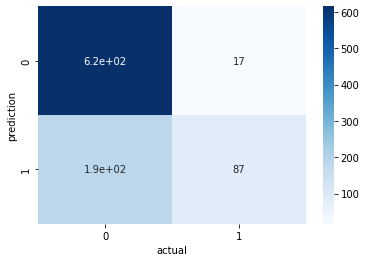

In [92]:
sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.show()

In [94]:
#Obtengo los verdaderos negativos y resto de valores que indica la matriz de confusion para obtener otras metricas como lo son la sensibilidad
#y la especificidad 
TN=cm[0][0]
TP=cm[1][1]
FN=cm[0][1]
FP=cm[1][0]

In [104]:
precision  = TP/(TP+FP)
print('Precision :',np.around(precision,2))

Precision : 0.61


In [95]:
sensibilidad = TP/(TP+FN)
print('Sensibilidad :',np.around(sensibilidad,2))

Sensibilidad : 0.32


In [96]:
espcificidad = 1-TN/(TN+FP)
print('Especificidad :',np.around(sensibilidad,2))

Especificidad : 0.32


### Curva ROC 

In [99]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5] #Realizo la division de mis valores 
sensitivities1 = [1]
especifities1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(y_test)
    prob_df.head() #este codigo verfica y encasilla las predicciones en cada porcentaje del treshold 

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities1.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities1.append(espc_1)

sensitivities1.append(0)
especifities1.append(0)

Text(0.5, 1.0, 'Curva ROC')

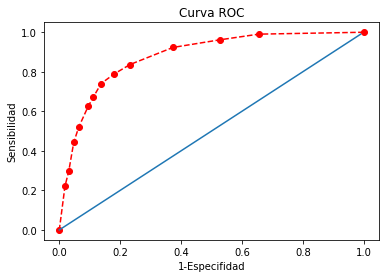

In [101]:
plt.plot(especifities1, sensitivities1, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


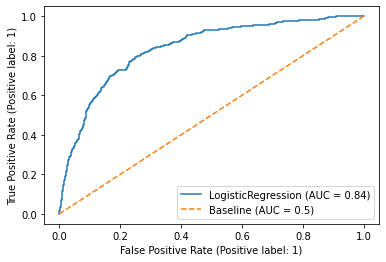

In [107]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(log_reg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

1. ¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?

* La mejor manera de valuar el modelo es generar diferentes metricas donde las mas importantes serian el escore de nuestros modelos y la sensibilidad del mismo  


3. ¿De qué otras formas podrías mejorar este modelo?

* Seria realizar una revision completa de la data y escogermediante investigacion las variables a formar parte de nuestro modelo.